<a href="https://colab.research.google.com/github/sebastianloaa/escuela/blob/main/Examen_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebastian Lopez Aguilar
A01253285

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("FAC2022.csv")
df = pd.DataFrame(df)
df

,FECHA,CO,NO,NO2,NOX,O3,PM10,SO2
0,01/01/2022,0.89,11,39,50,4,97,1
1,01/01/2022,0.89,11,38,48,5,107,1
2,01/01/2022,0.89,15,37,52,4,127,1
3,01/01/2022,1.10,31,39,70,2,120,1
4,01/01/2022,0.76,9,34,43,4,89,0
...,...,...,...,...,...,...,...,...
8011,30/11/2022,0.20,3,16,19,20,64,1
8012,30/11/2022,0.16,1,13,14,21,52,1
8013,30/11/2022,0.16,2,12,14,20,33,1
8014,30/11/2022,0.12,1,12,13,19,31,1


#Parte 1. Análisis descriptivo de los datos

##a)
Indique las características de su base de datos (cuántas variables hay y de qué tipo (si son categóricas o numéricas, cuantas observaciones son (vectores de medición, es decir, filas).



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   8016 non-null   object 
 1   CO      8016 non-null   float64
 2   NO      8016 non-null   int64  
 3   NO2     8016 non-null   int64  
 4   NOX     8016 non-null   int64  
 5   O3      8016 non-null   int64  
 6   PM10    8016 non-null   int64  
 7   SO2     8016 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 501.1+ KB


In [4]:
for columna in df.iloc[:,1:].columns:
  print(columna, len(set(df[columna])))
#Para ver cuantos valores unicos tiene cada columna, para ver si alguna podria ser categorica

CO 259
NO 193
NO2 87
NOX 221
O3 125
PM10 178
SO2 53


**Notas:**
- LA tabla contiene una columna de fecha, 1 columna que es numerica con valores continuos y 6 columnas que son numericas con valores discretos
- La ultima columna (SO2) podria ser una variable categorica, pero cuenta con 53 valores unicos
- El numero de observaciones es de 8016 filas

In [5]:
numericas = df[["CO","NO","NO2","NOX","O3","PM10","SO2"]]
fecha = df["FECHA"]

In [6]:
for columna in df.iloc[:,1:].columns:
  print(df[columna][df[columna] < 0].value_counts())
#Para ver cuantos valores perdidos tiene cada columna

-99.0    881
Name: CO, dtype: int64
-99    941
Name: NO, dtype: int64
-99    941
Name: NO2, dtype: int64
-99    941
Name: NOX, dtype: int64
-99    896
Name: O3, dtype: int64
-99    1458
Name: PM10, dtype: int64
-99    861
Name: SO2, dtype: int64


In [7]:
for columna in df.iloc[:,1:].columns:
  df = df[df[columna] >= 0]
#Para eliminar los valores perdidos en cada columna

In [8]:
df
#Para mostrar el dataset despues de eliminar los valores perdidos

,FECHA,CO,NO,NO2,NOX,O3,PM10,SO2
0,01/01/2022,0.89,11,39,50,4,97,1
1,01/01/2022,0.89,11,38,48,5,107,1
2,01/01/2022,0.89,15,37,52,4,127,1
3,01/01/2022,1.10,31,39,70,2,120,1
4,01/01/2022,0.76,9,34,43,4,89,0
...,...,...,...,...,...,...,...,...
8011,30/11/2022,0.20,3,16,19,20,64,1
8012,30/11/2022,0.16,1,13,14,21,52,1
8013,30/11/2022,0.16,2,12,14,20,33,1
8014,30/11/2022,0.12,1,12,13,19,31,1


In [9]:
for columna in df.iloc[:,1:].columns:
  print(df[columna][df[columna] < 0].value_counts())
#Para verificar que se hayan eliminado los valores perdidos

Series([], Name: CO, dtype: int64)
Series([], Name: NO, dtype: int64)
Series([], Name: NO2, dtype: int64)
Series([], Name: NOX, dtype: int64)
Series([], Name: O3, dtype: int64)
Series([], Name: PM10, dtype: int64)
Series([], Name: SO2, dtype: int64)


In [10]:
for columna in df.iloc[:,1:].columns:
  print(df[columna][df[columna] == 0].value_counts())
#Para ver las columnas que tienen valores igual a 0 y cuantos son

0.0    4
Name: CO, dtype: int64
0    492
Name: NO, dtype: int64
Series([], Name: NO2, dtype: int64)
Series([], Name: NOX, dtype: int64)
0    18
Name: O3, dtype: int64
Series([], Name: PM10, dtype: int64)
0    550
Name: SO2, dtype: int64


##b)
Describa con medidas resumen las variables (media, mediana, varianza, desviación estánar, cuartil 1, cuartil 3, minimo, máximo, etc.). Calcule el coeficiente de variación de cada variable numérica. Si hubiera variables categóricas haga una tabla de frecuencias relativas de sus niveles. La variable fecha no la tome en cuenta (es ideal para series de tiempo, pero no es el caso para este análisis).  

In [11]:
df.describe()

,CO,NO,NO2,NOX,O3,PM10,SO2
count,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000
mean,0.435529,16.301659,21.983089,38.282171,27.013690,38.786117,3.433886
std,0.427568,29.570802,12.207092,36.483322,22.899017,27.639239,5.322964
min,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000
25%,0.180000,2.000000,13.000000,16.000000,10.000000,20.000000,1.000000
50%,0.290000,5.000000,19.000000,25.000000,21.000000,33.000000,2.000000
75%,0.520000,15.000000,28.000000,45.000000,39.000000,52.000000,4.000000
max,3.220000,251.000000,102.000000,278.000000,146.000000,263.000000,94.000000


In [12]:
import numpy as np

# Calcular la media y la desviación estándar
media = np.mean(numericas)
desviacion_estandar = np.std(numericas)

# Calcular el coeficiente de variación
coeficiente_de_variacion = (desviacion_estandar / media) * 100

# Imprimir el resultado
print("Coeficiente de Variación:\n",coeficiente_de_variacion)


Coeficiente de Variación:
 CO      -296.125309
NO      1995.518668
NO2      543.877981
NOX      259.282325
O3       347.344949
PM10     431.808638
SO2     -418.085913
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


##c)
Describa gráficamente los datos (los categóricos con diagramas de barra o pastel), los numéricos con un gráfico que contenga todos los boxplot de cada variable numérica. Interprete los resultados. ¿Habrá necesidad de escalar los datos para una mejor comparación de los datos? Si fuera el caso, escálelos y vuelva a hacer el diagrama.

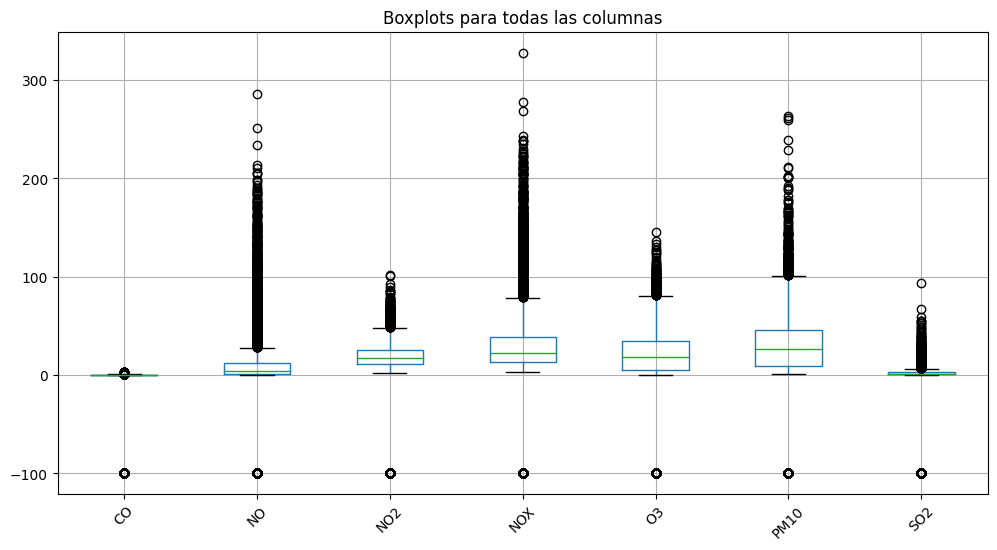

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear boxplots para todas las columnas
plt.figure(figsize=(12, 6))
numericas.boxplot()  # Crea boxplots para todas las columnas del DataFrame
plt.title('Boxplots para todas las columnas')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x
plt.show()


In [14]:
#Aqui creamos un boxplot para todas las columnas que tiene el dataset pero no podemos ver con facilidad los datos

In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado a todas las columnas del DataFrame
numericas_scaled = pd.DataFrame(scaler.fit_transform(numericas), columns=numericas.columns)


#Ahora aplicamos un MinMaxScaler para poder visualizar mejor los datos

In [16]:
numericas_scaled
#Mostramos el dataset ya escalado de los datos numericos

,CO,NO,NO2,NOX,O3,PM10,SO2
0,0.977206,0.285714,0.686567,0.348946,0.420408,0.541436,0.518135
1,0.977206,0.285714,0.681592,0.344262,0.424490,0.569061,0.518135
2,0.977206,0.296104,0.676617,0.353630,0.420408,0.624309,0.518135
3,0.979260,0.337662,0.686567,0.395785,0.412245,0.604972,0.518135
4,0.975934,0.280519,0.661692,0.332553,0.420408,0.519337,0.512953
...,...,...,...,...,...,...,...
8011,0.970456,0.264935,0.572139,0.276347,0.485714,0.450276,0.518135
8012,0.970065,0.259740,0.557214,0.264637,0.489796,0.417127,0.518135
8013,0.970065,0.262338,0.552239,0.264637,0.485714,0.364641,0.518135
8014,0.969673,0.259740,0.552239,0.262295,0.481633,0.359116,0.518135


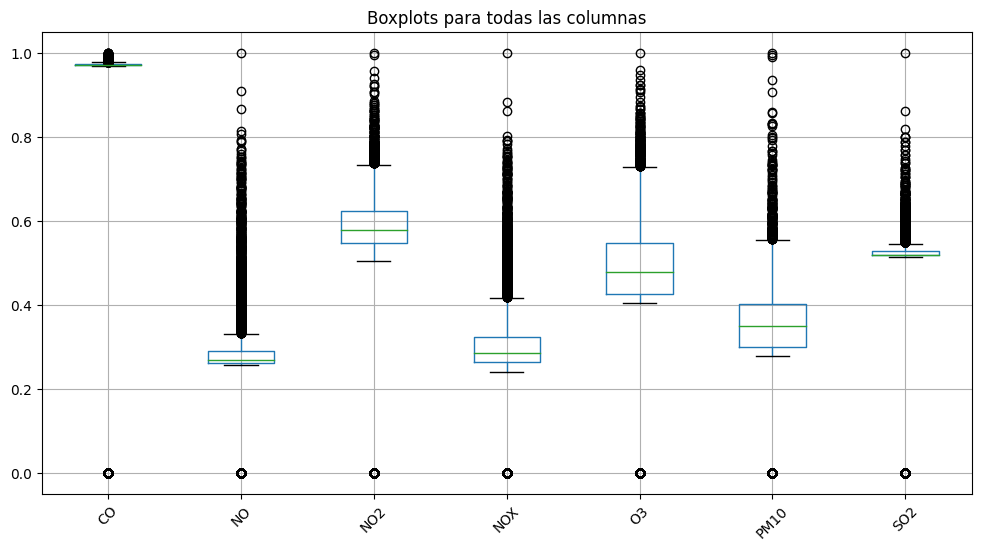

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear boxplots para todas las columnas
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura
numericas_scaled.boxplot()  # Crea boxplots para todas las columnas del DataFrame
plt.title('Boxplots para todas las columnas')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x
plt.show()

In [18]:
#Ahora volvemos a mostrar el boxplot ya que los datos estan escalados para poder visualizarlo mejor.

In [19]:
def boxplot(df,columna):
  plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura para cada boxplot
  plt.boxplot(df[columna])  # Crea el boxplot para la columna actual
  plt.title(f'Boxplot de {columna}')
  plt.ylabel(columna)
  plt.show()

In [20]:
numericas.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2'], dtype='object')

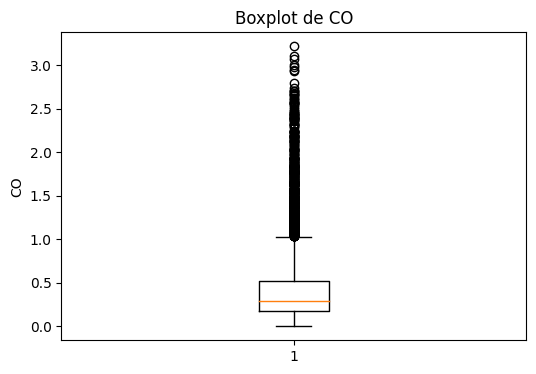

In [21]:
boxplot(df,"CO")

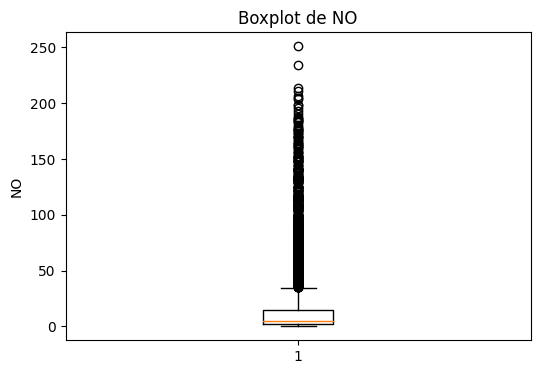

In [22]:
boxplot(df,"NO")

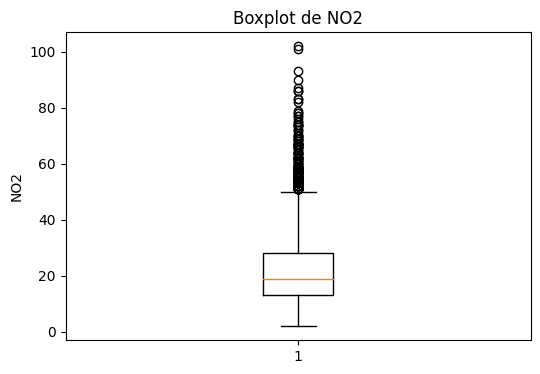

In [23]:
boxplot(df,"NO2")

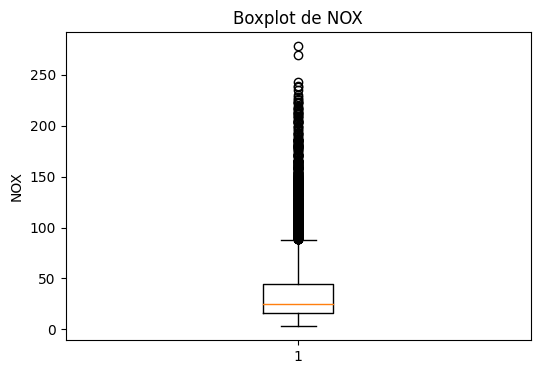

In [24]:
boxplot(df,"NOX")

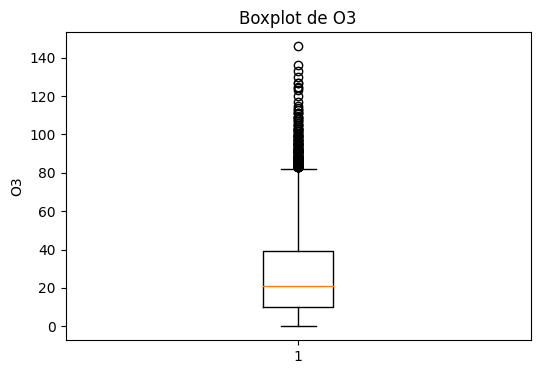

In [25]:
boxplot(df,"O3")

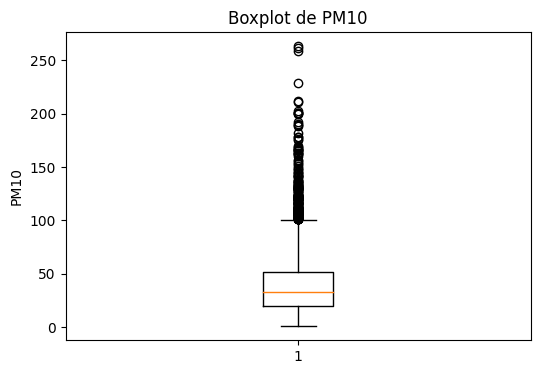

In [26]:
boxplot(df,"PM10")

##d)
Verifique normalidad de los datos y si no todos pasan la prueba haga una matriz e correlaciones de Spearman, y si sí la pasan, haga una matriz e correlaciones de Pearson. Identifique la variable que más se correlaciona con las demás.

In [27]:
import scipy.stats as stats
import numpy as np



# Realizar la prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(numericas["CO"])
print("Prueba de Shapiro-Wilk:")
print("Estadístico de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

# Realizar la prueba de Kolmogorov-Smirnov
ks_test = stats.kstest(numericas["CO"], 'norm')
print("\nPrueba de Kolmogorov-Smirnov:")
print("Estadístico de prueba:", ks_test.statistic)
print("Valor p:", ks_test.pvalue)


Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.3718259930610657
Valor p: 0.0

Prueba de Kolmogorov-Smirnov:
Estadístico de prueba: 0.3960732598412583
Valor p: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [28]:
numericas.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2'], dtype='object')

In [29]:
for columnas in numericas.columns:
  print('\033[1m' + columnas + '\033[0m')

  # Realizar la prueba de Shapiro-Wilk
  shapiro_test = stats.shapiro(numericas[columnas])
  print("Prueba de Shapiro-Wilk:")
  print("Estadístico de prueba:", shapiro_test.statistic)
  print("Valor p:", shapiro_test.pvalue)

  # Realizar la prueba de Kolmogorov-Smirnov
  ks_test = stats.kstest(numericas[columnas], 'norm')
  print("\nPrueba de Kolmogorov-Smirnov:")
  print("Estadístico de prueba:", ks_test.statistic)
  print("Valor p:", ks_test.pvalue)


CO
Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.3718259930610657
Valor p: 0.0

Prueba de Kolmogorov-Smirnov:
Estadístico de prueba: 0.3960732598412583
Valor p: 0.0
NO
Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.7444002628326416
Valor p: 0.0

Prueba de Kolmogorov-Smirnov:
Estadístico de prueba: 0.6863317043791661
Valor p: 0.0
NO2
Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.6401568651199341
Valor p: 0.0

Prueba de Kolmogorov-Smirnov:
Estadístico de prueba: 0.8817048557042747
Valor p: 0.0
NOX
Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.832919716835022
Valor p: 0.0

Prueba de Kolmogorov-Smirnov:
Estadístico de prueba: 0.8818296062032767
Valor p: 0.0
O3
Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.8049697279930115
Valor p: 0.0

Prueba de Kolmogorov-Smirnov:
Estadístico de prueba: 0.813202961864196
Valor p: 0.0
PM10
Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.8284163475036621
Valor p: 0.0

Prueba de Kolmogorov-Smirnov:
Estadístico de prueba: 0.8044135750222621
Val

In [30]:
#No pasaron la prueba de normalidad

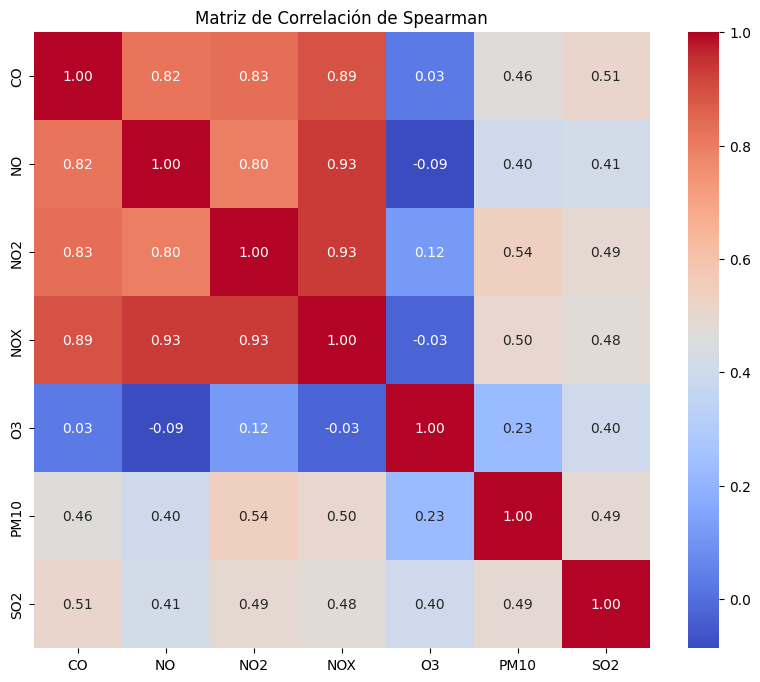

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de Spearman
correlation_matrix = numericas.corr(method='spearman')

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación de Spearman')
plt.show()


Podemos ver en la matriz de correlacion, que las columnas que tienen una correlacion mas fuerte son las columnas:
- NO2 vs NOX
- NO vs NOX
- CO vs NOX


#Parte 2. Regresión simple y curvilínea

##A)
Con la variable que más se correlacionó con las demás como variable Respuesta (y), y la variable de más alta correlación con ella (será x) hacer un modelo de correlación lineal simple y obtener su ecuación. Encuentre el valor de R^2  y verifique que  beta1 (el coeficiente de la pendiente de la recta sea significativo (con alfa = 0.05)).



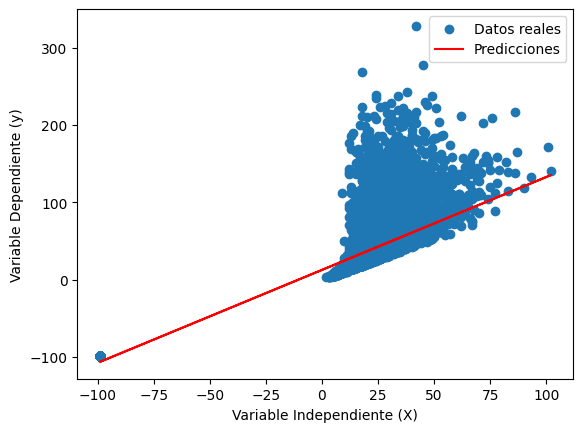

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array(numericas["NO2"])
y = np.array(numericas["NOX"])

# Crear una instancia del modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo utilizando los datos
modelo.fit(X.reshape(-1, 1), y)

# Realizar predicciones
y_pred = modelo.predict(X.reshape(-1, 1))

# Visualizar los resultados
plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Predicciones')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.show()



In [33]:
from sklearn.metrics import r2_score

# Calcular el valor R-squared
r_squared = r2_score(y, y_pred)

print(f"Coeficiente de determinación R-squared: {r_squared}")

Coeficiente de determinación R-squared: 0.7694207749843991


In [34]:
#Podemos ver que este modelo tiene cierto nivel de confianza pero no esta muy alto

##B)
Pruebe ahora con un modelo curvilíneo que mejore el R^2. Del mejor modelo obtenido haga un análisis residual (Grafico de residuales (valores estimados de y vs. valores de los residuos), Prueba de hipótesis de media 0 para los residuos, prueba de normalidad para los residuos su gráfico qqplot ,  argumentación sobre si cumplen homocedasticidad)

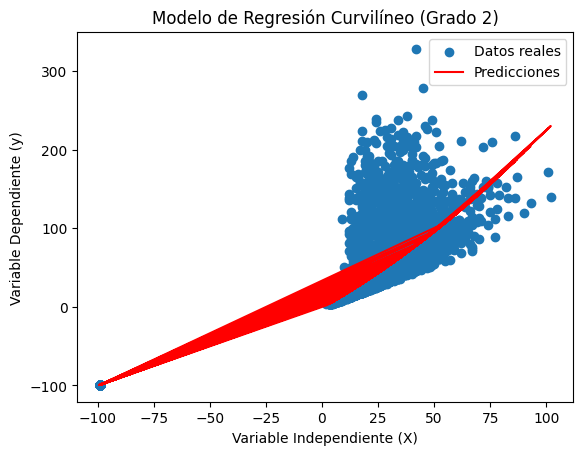

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = np.array(numericas["NO2"])  # Variable independiente (X)
y = np.array(numericas["NOX"])  # Variable dependiente (y)

# Transformar los datos de X
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.reshape(-1, 1))

modelo = LinearRegression()

# Entrenar el modelo utilizando los datos transformados
modelo.fit(X_poly, y)

# Realizar predicciones
y_pred = modelo.predict(X_poly)

# Visualizar los resultados
plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Predicciones')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.title('Modelo de Regresión Curvilíneo (Grado 2)')
plt.show()


In [36]:
from sklearn.metrics import r2_score

# Calcular el valor R-squared
r_squared = r2_score(y, y_pred)

print(f"Coeficiente de determinación R-squared: {r_squared}")


Coeficiente de determinación R-squared: 0.7989475174744154


In [37]:
#Aqui mejoramos un poco la confianza de el modelo pero seguimos sin llegar a un nivel de confianza aceptable

#Parte 3. Regresión múltiple

##A)
Con la misma variable respuesta de la parte anterior, añada todas las variables restantes como regresoras y elimine las que no resulten con beta significativa, vuelva a aplicar la regresión múltiple y excluya las variables no significativas y reduzca el modelo y así sucesivamente hasta obtener un modelo económico y eficiente. Hacer análisis de residuos al modelo final.

Coeficientes de la regresión:
Intercepto: 17.313838506520522
Coeficientes de las variables independientes: [0.22989653 1.01368819]


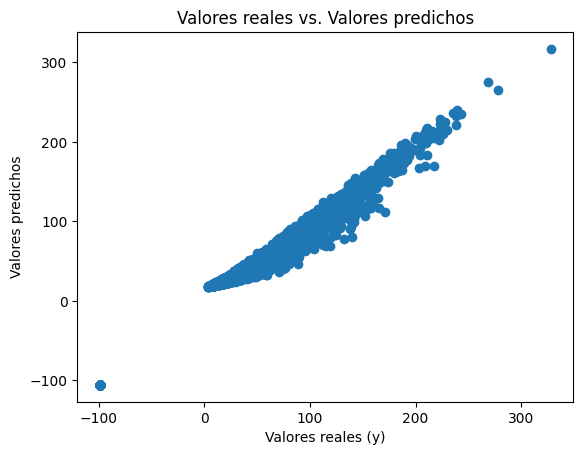

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array(numericas[["NO2","NO"]])  # Dos variables independientes (X1 y X2)
y = np.array(numericas["NOX"])  # Variable dependiente (y)

modelo = LinearRegression()

# Entrenar el modelo utilizando los datos
modelo.fit(X, y)

# Realizar predicciones
y_pred = modelo.predict(X)

# Imprimir los coeficientes de la regresión
print("Coeficientes de la regresión:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes de las variables independientes:", modelo.coef_)

plt.scatter(y, y_pred)
plt.xlabel("Valores reales (y)")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Valores predichos")
plt.show()


In [39]:
from sklearn.metrics import r2_score

# Calcular el valor R-squared
r_squared = r2_score(y, y_pred)

print(f"Coeficiente de determinación R-squared: {r_squared}")

Coeficiente de determinación R-squared: 0.9741436579013503


In [40]:
#Aqui ya podemos ver que tenemos un nivel de confianza bastante aceptable en el que tenemos 97.41% de valor R2